In [1]:
# Importer les bibliothÃ¨ques
import pandas as pd

# Charger le fichier diabetes.csv
df = pd.read_csv("diabetes.csv")

# Afficher les 5 premiÃ¨res lignes du tableau
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
# Liste des colonnes Ã  corriger
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Afficher combien de zÃ©ros il y a dans chaque colonne
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col} contient {zero_count} valeurs Ã  0")


Glucose contient 5 valeurs Ã  0
BloodPressure contient 35 valeurs Ã  0
SkinThickness contient 227 valeurs Ã  0
Insulin contient 374 valeurs Ã  0
BMI contient 11 valeurs Ã  0


In [3]:
# Remplacer les 0 par la mÃ©diane dans les colonnes concernÃ©es
for col in cols_to_check:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# VÃ©rification : les 0 ont-ils Ã©tÃ© supprimÃ©s ?
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col} contient maintenant {zero_count} valeurs Ã  0")


Glucose contient maintenant 0 valeurs Ã  0
BloodPressure contient maintenant 0 valeurs Ã  0
SkinThickness contient maintenant 0 valeurs Ã  0
Insulin contient maintenant 0 valeurs Ã  0
BMI contient maintenant 0 valeurs Ã  0


Matplotlib is building the font cache; this may take a moment.


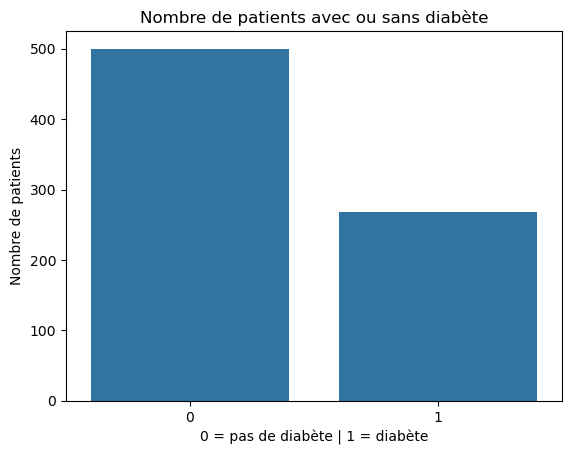

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter combien de patients ont le diabÃ¨te (1) et combien ne l'ont pas (0)
sns.countplot(x='Outcome', data=df)
plt.title("Nombre de patients avec ou sans diabÃ¨te")
plt.xlabel("0 = pas de diabÃ¨te | 1 = diabÃ¨te")
plt.ylabel("Nombre de patients")
plt.show()


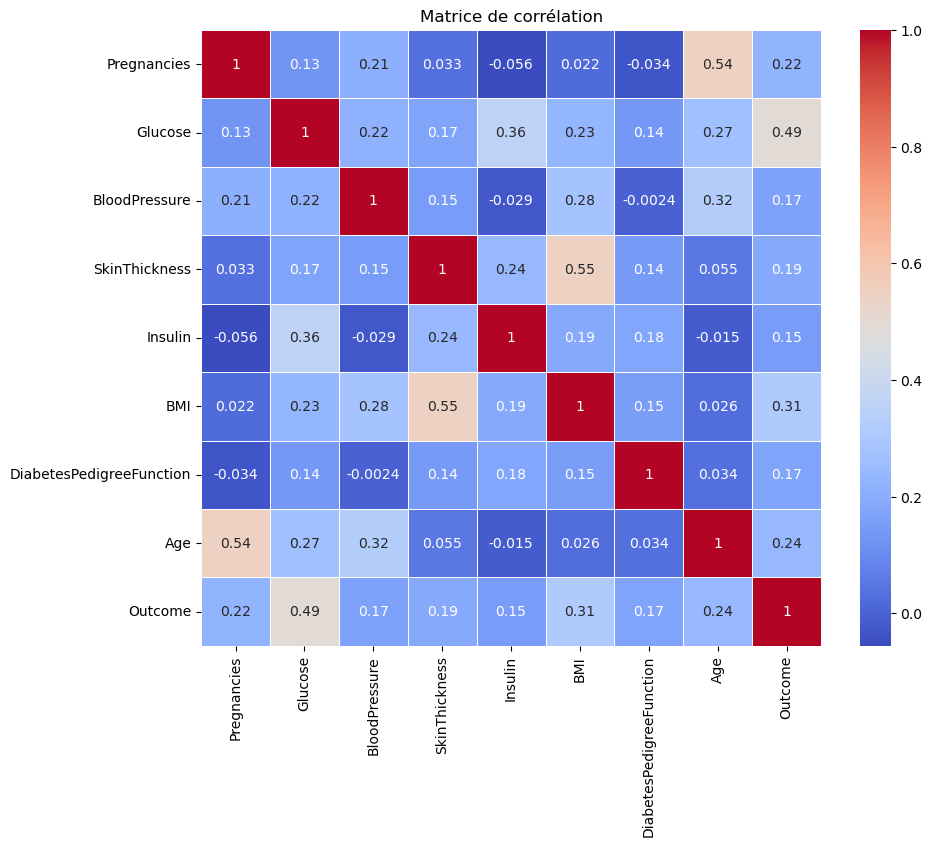

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrÃ©lation")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# SÃ©parer les colonnes en variables d'entrÃ©e (X) et la sortie (y)
X = df.drop("Outcome", axis=1)  # On enlÃ¨ve la colonne "Outcome"
y = df["Outcome"]               # C'est ce qu'on veut prÃ©dire (0 ou 1)

# Diviser le dataset en donnÃ©es d'entraÃ®nement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Afficher les dimensions
print("DonnÃ©es d'entraÃ®nement :", X_train.shape)
print("DonnÃ©es de test        :", X_test.shape)


DonnÃ©es d'entraÃ®nement : (614, 8)
DonnÃ©es de test        : (154, 8)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# CrÃ©er le modÃ¨le
model = LogisticRegression(max_iter=1000)  # max_iter pour Ãªtre sÃ»r qu'il converge

# EntraÃ®ner le modÃ¨le
model.fit(X_train, y_train)

# Faire des prÃ©dictions sur les donnÃ©es de test
y_pred = model.predict(X_test)

# Ã‰valuer le modÃ¨le
print("ðŸ“Š Accuracy :", accuracy_score(y_test, y_pred))
print("\nðŸ“‹ Rapport de classification :")
print(classification_report(y_test, y_pred))
print("\nðŸ§± Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


ðŸ“Š Accuracy : 0.7597402597402597

ðŸ“‹ Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154


ðŸ§± Matrice de confusion :
[[82 17]
 [20 35]]


In [8]:
from sklearn.tree import DecisionTreeClassifier

# CrÃ©er le modÃ¨le
tree_model = DecisionTreeClassifier(random_state=42)

# EntraÃ®ner le modÃ¨le
tree_model.fit(X_train, y_train)

# PrÃ©dictions
y_pred_tree = tree_model.predict(X_test)

# Ã‰valuation
print("ðŸŒ³ Accuracy (Decision Tree) :", accuracy_score(y_test, y_pred_tree))
print("\nðŸ“‹ Rapport de classification :")
print(classification_report(y_test, y_pred_tree))
print("\nðŸ§± Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_tree))


ðŸŒ³ Accuracy (Decision Tree) : 0.7272727272727273

ðŸ“‹ Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


ðŸ§± Matrice de confusion :
[[74 25]
 [17 38]]


In [10]:
from sklearn.tree import DecisionTreeClassifier

# CrÃ©er le modÃ¨le Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# EntraÃ®ner le modÃ¨le
tree_model.fit(X_train, y_train)

# PrÃ©dictions
y_pred_tree = tree_model.predict(X_test)

# Ã‰valuation
print("ðŸŒ³ Accuracy (Decision Tree) :", accuracy_score(y_test, y_pred_tree))
print("\nðŸ“‹ Rapport de classification :")
print(classification_report(y_test, y_pred_tree))
print("\nðŸ§± Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_tree))


ðŸŒ³ Accuracy (Decision Tree) : 0.7272727272727273

ðŸ“‹ Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


ðŸ§± Matrice de confusion :
[[74 25]
 [17 38]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

# CrÃ©er le modÃ¨le KNN avec k=5 voisins
knn_model = KNeighborsClassifier(n_neighbors=5)

# EntraÃ®ner
knn_model.fit(X_train, y_train)

# PrÃ©dictions
y_pred_knn = knn_model.predict(X_test)

# Ã‰valuation
print("ðŸ‘¥ Accuracy (KNN) :", accuracy_score(y_test, y_pred_knn))
print("\nðŸ“‹ Rapport de classification :")
print(classification_report(y_test, y_pred_knn))
print("\nðŸ§± Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_knn))


ðŸ‘¥ Accuracy (KNN) : 0.6558441558441559

ðŸ“‹ Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        99
           1       0.52      0.62      0.56        55

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.66      0.66       154


ðŸ§± Matrice de confusion :
[[67 32]
 [21 34]]
